         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

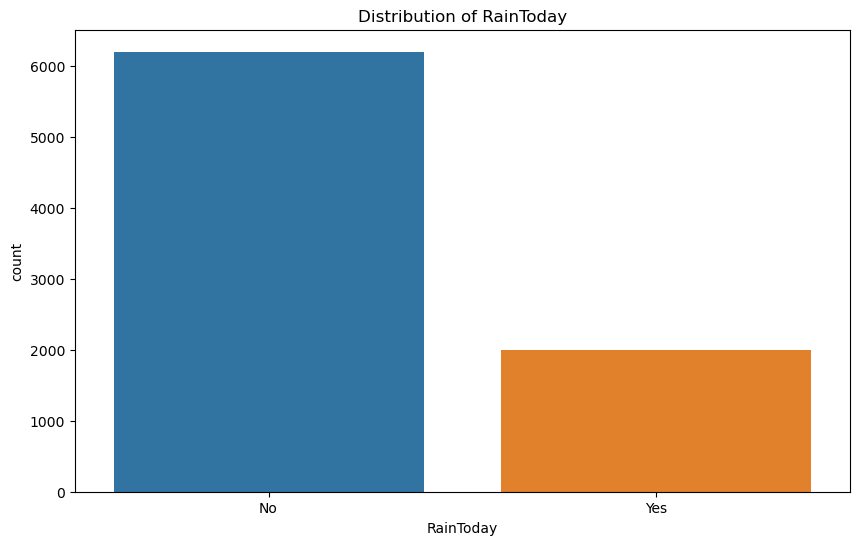

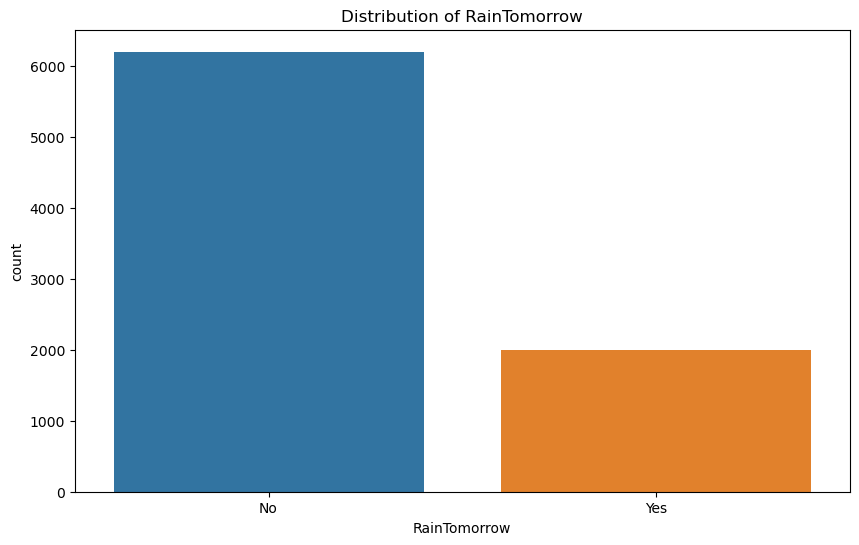

Mean Absolute Error for Rainfall Prediction (Cleaned Data): 1.907871105681124
Mean Squared Error for Rainfall Prediction (Cleaned Data): 71.40358928466708
R-squared for Rainfall Prediction (Cleaned Data): 0.38198631915882375


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 1: Data Loading
data_url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Rainfall%20Forecast/Rainfall.csv"
rainfall_data = pd.read_csv(data_url)

# Step 2: Exploratory Data Analysis (EDA)
print(rainfall_data.head())
print(rainfall_data.info())
print(rainfall_data.describe())

# Visualize the distribution of the target variables (RainToday and RainTomorrow)
plt.figure(figsize=(10, 6))
sns.countplot(x='RainToday', data=rainfall_data)
plt.title('Distribution of RainToday')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=rainfall_data)
plt.title('Distribution of RainTomorrow')
plt.show()

# Step 3: Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = rainfall_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    rainfall_data[col] = label_encoder.fit_transform(rainfall_data[col])

# Split the dataset into features (X) and target variables (y) for both problem statements
X_rain_tomorrow = rainfall_data.drop(['RainTomorrow'], axis=1)
y_rain_tomorrow = rainfall_data['RainTomorrow']

X_rainfall = rainfall_data.drop(['Rainfall'], axis=1)
y_rainfall = rainfall_data['Rainfall']

# Handle missing values in the target variable
rainfall_data_cleaned = rainfall_data.dropna(subset=['Rainfall'])

# Split the dataset into features and target variables for Rainfall Prediction
X_rainfall_cleaned = rainfall_data_cleaned.drop(['Rainfall'], axis=1)
y_rainfall_cleaned = rainfall_data_cleaned['Rainfall']

# Split the data into training and testing sets for Rainfall Prediction
X_train_rf_cleaned, X_test_rf_cleaned, y_train_rf_cleaned, y_test_rf_cleaned = train_test_split(X_rainfall_cleaned, y_rainfall_cleaned, test_size=0.2, random_state=42)

# Handle missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_rf_cleaned_imputed = imputer.fit_transform(X_train_rf_cleaned)
X_test_rf_cleaned_imputed = imputer.transform(X_test_rf_cleaned)

# Step 4: Model Building for Rainfall Prediction
# Initialize the RandomForestRegressor
rf_regressor_cleaned = RandomForestRegressor(random_state=42)

# Train the regressor
rf_regressor_cleaned.fit(X_train_rf_cleaned_imputed, y_train_rf_cleaned)

# Make predictions on the test set
y_pred_rf_cleaned = rf_regressor_cleaned.predict(X_test_rf_cleaned_imputed)

# Calculate evaluation metrics for cleaned data
mae_cleaned = mean_absolute_error(y_test_rf_cleaned, y_pred_rf_cleaned)
mse_cleaned = mean_squared_error(y_test_rf_cleaned, y_pred_rf_cleaned)
r2_cleaned = r2_score(y_test_rf_cleaned, y_pred_rf_cleaned)
print("Mean Absolute Error for Rainfall Prediction (Cleaned Data):", mae_cleaned)
print("Mean Squared Error for Rainfall Prediction (Cleaned Data):", mse_cleaned)
print("R-squared for Rainfall Prediction (Cleaned Data):", r2_cleaned)
